# Multi Output Regression

## WiFi data processing

In [1]:
import pandas as pd

In [2]:
wifi_data = pd.read_csv("wifi_data.csv")
# Remove rows if x or y is null
wifi_data = wifi_data[wifi_data['x'].notna()]
wifi_data = wifi_data[wifi_data['y'].notna()]

# Remove rows if location_coded is location_unknown
wifi_data = wifi_data[wifi_data['location_coded'] != 'location_unknown']

# Fill all NaN with -174
wifi_data = wifi_data.fillna(-174)

In [ ]:
wifi_data.tail(5)

In [41]:
wifi_data_display = pd.read_csv("wifi_data.csv")

first_col = wifi_data_display.iloc[:, 0:3]
last_col = wifi_data_display.iloc[:, -6:]

df = pd.DataFrame({'...':['...']})
for i in range(len(wifi_data_display)):
    df.loc[i] = ['...']

wifi_data_display = first_col.join(df, how = 'right')
wifi_data_display = wifi_data_display.join(last_col, how = 'right')
wifi_data_display

,WifiAccessPoint_0,WifiAccessPoint_1,WifiAccessPoint_2,...,WifiAccessPoint_88,WifiAccessPoint_89,WifiAccessPoint_90,x,y,location_coded
0,-125,-65.0,-67.0,...,NaN,NaN,NaN,0.220686,0.692311,location_3626775
1,-121,NaN,-76.0,...,NaN,NaN,NaN,0.356841,0.707761,location_3627737
2,-130,NaN,-98.0,...,NaN,NaN,NaN,0.271492,0.395226,location_3626772
3,-125,-49.0,-56.0,...,NaN,NaN,NaN,0.413128,0.860029,location_3628699
4,-117,NaN,-75.0,...,NaN,NaN,NaN,0.324798,0.107172,location_3627731
...,...,...,...,...,...,...,...,...,...,...
3848,-133,-69.0,-64.0,...,NaN,NaN,NaN,0.840588,0.407135,location_3632539
3849,-119,-67.0,-67.0,...,NaN,NaN,NaN,0.686431,0.958298,location_3630622
3850,-129,-79.0,-71.0,...,NaN,NaN,NaN,0.582750,0.291617,location_3629654
3851,-123,-81.0,-92.0,...,NaN,NaN,NaN,0.117533,0.804791,location_3625816


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = wifi_data.iloc[:, 0:91]
y = wifi_data.loc[:, ['x', 'y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1235)

## GradientBoostingRegressor

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

gradientBoostingRegressor = GradientBoostingRegressor(random_state=50)
gbr = MultiOutputRegressor(gradientBoostingRegressor)
gbr.fit(X_train, y_train)

In [12]:
y_predict = gbr.predict(X_test)
print(y_predict)

[[0.67852218 0.50140919]
 [0.7616588  0.825278  ]
 [0.70907422 0.95893329]
 ...
 [0.67034469 0.36474274]
 [0.70214999 0.60111012]
 [0.47269741 0.32637598]]


In [29]:
gbr.score(X_test, y_test)

0.8572551623132392

In [30]:
mean_absolute_error(gbr.predict(X), y)

0.05904935882976213

In [31]:
mean_squared_error(gbr.predict(X), y)

0.007172460051297361

## Multi Output Regression with XGBoost Regressor

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
import xgboost

X = wifi_data.iloc[:, 0:91]
y = wifi_data.loc[:, ['x', 'y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1235)

xgbr = MultiOutputRegressor(estimator = xgboost.XGBRegressor(booster = 'gbtree',
                                                             n_estimators = 500,
                                                             max_depth = 6))
xgbr.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=6,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror',
                                          

In [24]:
y_predict = xgbr.predict(X_test)
print(y_predict)

[[0.651644   0.48153365]
 [0.726624   0.84948814]
 [0.6912579  0.96184486]
 ...
 [0.54953504 0.37590063]
 [0.6711887  0.60032433]
 [0.45060143 0.24692367]]


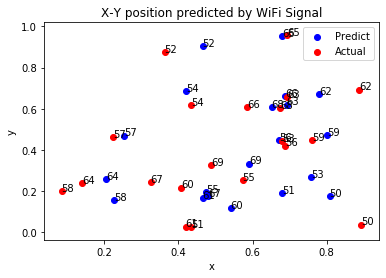

In [28]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

test_x, test_y = [], []
pred_x, pred_y = [], []

idx = 0
for coord in y_test.iterrows():
    if idx < 50:
        idx += 1
        continue
    if idx == 70:break
    test_x.append(coord[1][0])
    test_y.append(coord[1][1])
    plt.annotate(idx, (coord[1][0], coord[1][1]))
    idx += 1

idx = 0
for coord in y_predict:
    if idx < 50:
        idx += 1
        continue
    if idx == 70:break
    pred_x.append(coord[0])
    pred_y.append(coord[1])
    plt.annotate(idx, (coord[0], coord[1]))
    idx += 1

plt.title("X-Y position predicted by WiFi Signal")
plt.scatter(pred_x, pred_y, c = 'blue', label = 'Predict')
plt.scatter(test_x, test_y, c = 'red', label = 'Actual')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Coefficient of determination $R^2$

In [25]:
xgbr.score(X_test, y_test)

0.8987771694821642

### MAE (Mean Absolute Error)

In [30]:
mean_absolute_error(xgbr.predict(X), y)

0.016304499781738167

### MSE (Mean Squared Error)

In [31]:
mean_squared_error(xgbr.predict(X), y)

0.001770186326860313

## MLP Regression

In [33]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=1000, alpha=0.005, random_state=42)

mlpr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[1024, 512, 4], learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [34]:
y_predict = mlpr.predict(X_test)
print(y_predict)

[[0.45477488 0.50386431]
 [0.45477488 0.50386431]
 [0.45477488 0.50386431]
 ...
 [0.45477488 0.50386431]
 [0.45477488 0.50386431]
 [0.45477488 0.50386431]]


In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_train, mlpr.predict(X_train)))
print(r2_score(y_test, mlpr.predict(X_test)))

-0.05939010450469451
-0.04323252298799074


In [37]:
mean_absolute_error(mlpr.predict(X), y)

0.2273530233429245

In [38]:
mean_squared_error(mlpr.predict(X), y)

0.07005821930268036

# XGBoost Classification

In [28]:
import xgboost as xgb
X = wifi_data.iloc[:, 0:91]
y = wifi_data['location_coded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1235)

xgbc = xgb.XGBClassifier(n_estimators=1000, objective='multi:softmax', num_class=92, eval_metric='mlogloss')
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=16,
              num_class=92, num_parallel_tree=1, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [30]:
y_predict = xgbc.predict(X_test)
y_predict

array(['location_3631578', 'location_3632543', 'location_3630622', ...,
       'location_3630616', 'location_3631579', 'location_3629654'],
      dtype=object)

In [29]:
xgbc.score(X_test, y_test)

0.5839860748476936

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test, y_predict))

                  precision    recall  f1-score   support

location_3624847       0.00      0.00      0.00         4
location_3624848       0.64      0.78      0.70         9
location_3624849       0.57      0.79      0.67        34
location_3624851       0.86      0.75      0.80         8
location_3624852       0.81      0.76      0.79        17
location_3624853       0.50      0.25      0.33         4
location_3624854       0.62      0.89      0.73         9
location_3624855       0.00      0.00      0.00         5
location_3625808       0.33      1.00      0.50         1
location_3625810       0.00      0.00      0.00         6
location_3625811       0.47      0.62      0.53        13
location_3625812       0.00      0.00      0.00         1
location_3625813       0.62      0.62      0.62         8
location_3625814       0.20      0.25      0.22         4
location_3625815       0.00      0.00      0.00         1
location_3625816       0.00      0.00      0.00         2
location_3626

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[ 0  2  0 ...  0  0  0]
 [ 0  7  2 ...  0  0  0]
 [ 0  2 27 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


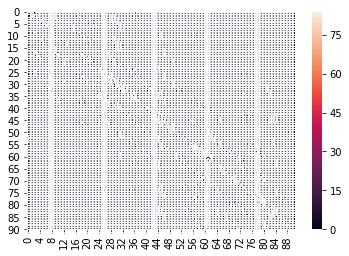

In [41]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(cm, annot=True)
plt.show()

3825    location_3632539
3774    location_3632543
2302    location_3630622
1107    location_3632542
2576    location_3631580
              ...       
1947    location_3629653
3283    location_3624852
1823    location_3628694
2332    location_3630618
2464    location_3629654
Name: location_coded, Length: 1149, dtype: object